# Lets Grow More - Nov 2021

## Task2: Prediction Using Decision Tree Algorithm (Intermediate Level)

### Author: Madhura U Jejurkar

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
#Loading DataSet
data=pd.read_csv('IRIS.csv')

In [6]:

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.shape

(150, 5)

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

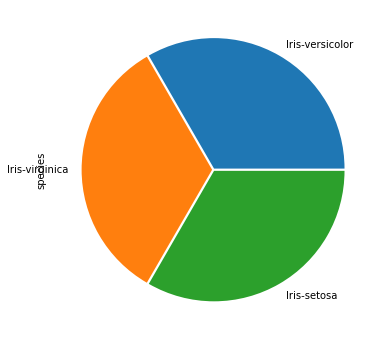

In [12]:
plt.subplots(1,1,figsize=(8,6))
data["species"].value_counts().plot.pie(explode=[0.01,0.01,0.01])
plt.show()

## Comparing The Relationship Between Variables:

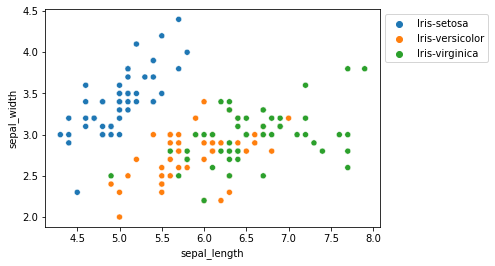

In [13]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=data)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

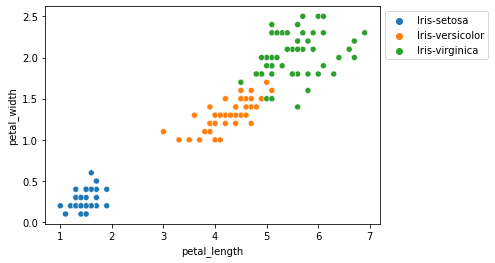

In [14]:

sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=data)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

## CORELATIONS:

In [15]:
corr=data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


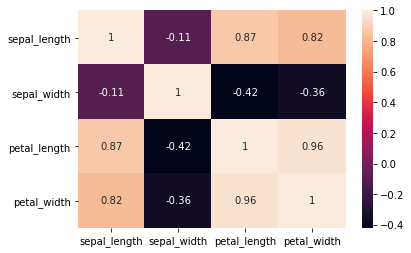

In [16]:
sns.heatmap(corr,annot=True)
plt.show()

## SPLITTING DATA INTO TRAIN AND TEST

In [17]:
x = data.iloc[:,:4].values
y = data.iloc[:,4:5]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


## BUILDING THE MODELS

In [19]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = model.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


## To check the accuracy of the model:

In [22]:
print('Accuracy of the model :',model.score(x_train,y_train)*100)

Accuracy of the model : 100.0


## VISUALIZING THE DECISION TREE

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

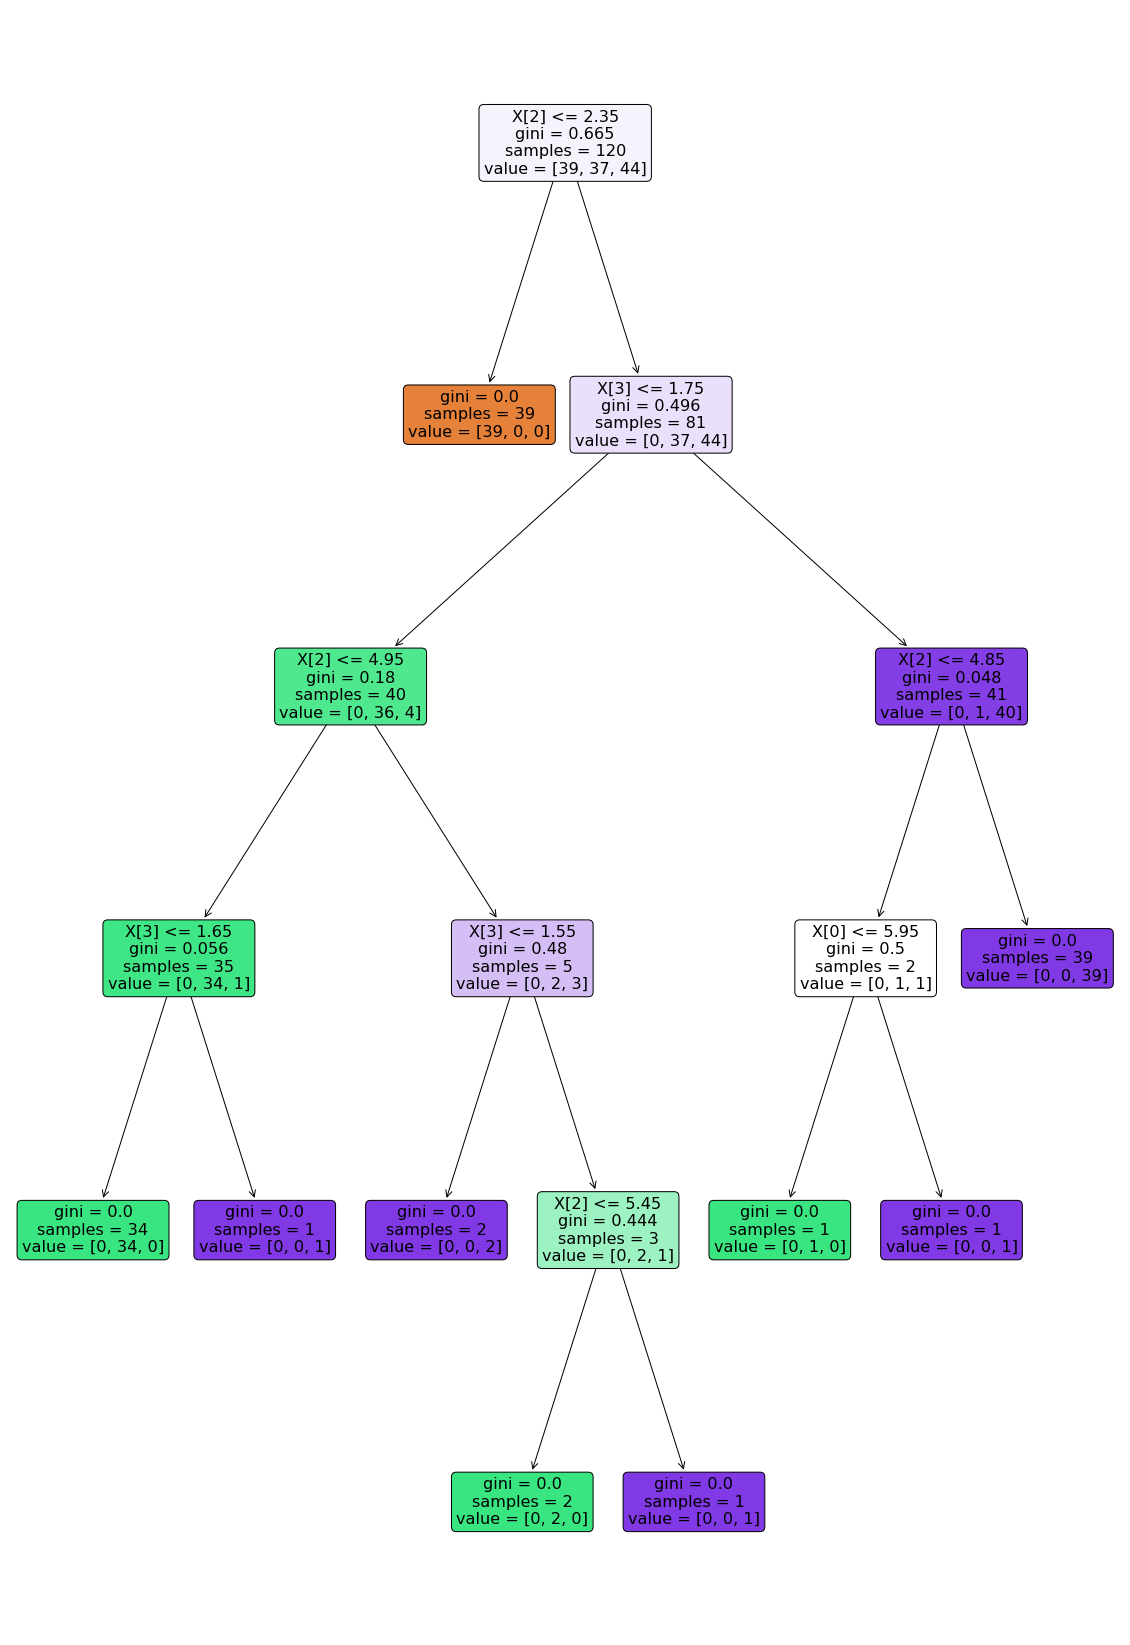

In [24]:
plt.figure(figsize = (20,30))
tree.plot_tree(model, filled=True, rounded=True)
plt.show()